In [12]:
import pandas as pd
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

In [13]:
train_df = pd.read_csv(r"D:\TimeSeries\BTTH1\train.csv")
train_df = train_df.loc[(train_df['Publication_Day']=='Wednesday')]
train_df.head()

id     Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
13  13      Gadget Geek    Episode 37                   92.50  Technology   
19  19       Sport Spot    Episode 61                   51.60      Sports   
20  20      Funny Folks   Episode 100                   54.67      Comedy   
22  22  Business Briefs    Episode 54                   66.22    Business   
25  25      Tech Trends    Episode 97                  105.35  Technology   

    Host_Popularity_percentage Publication_Day Publication_Time  \
13                       68.42       Wednesday        Afternoon   
19                       61.60       Wednesday          Evening   
20                       45.47       Wednesday        Afternoon   
22                       62.81       Wednesday            Night   
25                       55.03       Wednesday        Afternoon   

    Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
13                        87.87            0.0           Neutral   
19                        90.41            1.0          Positive   
20                          NaN            2.0           Neutral   
22                        88.86            0.0           Neutral   
25                        76.12            1.0           Neutral   

    Listening_Time_minutes  
13                50.93591  
19                14.96035  
20                29.22750  
22                47.60142  
25                99.15797

In [14]:
values = train_df['Listening_Time_minutes'].values

In [15]:
# Xử lý giá trị thiếu
cols_mean_fill = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']
for col in cols_mean_fill:
    if col in train_df.columns:
        train_df[col].fillna(train_df[col].mean(), inplace=True)

if 'Guest_Popularity_percentage' in train_df.columns:
    train_df['Guest_Popularity_percentage'].fillna(0, inplace=True)

C:\Users\May\AppData\Local\Temp\ipykernel_10032\2264323240.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mean(), inplace=True)
C:\Users\May\AppData\Local\Temp\ipykernel_10032\2264323240.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [16]:
# One-Hot Encoding for string columns
string_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
train_df = pd.get_dummies(train_df, columns=string_cols)

In [17]:
# Kalman cơ bản
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([[values[0]], [0.]])
kf.F = np.array([[1., 1.], [0., 1.]])
kf.H = np.array([[1., 0.]])
kf.P *= 1000.
kf.R = 5
kf.Q = 0.01

filtered_1 = []
for z in values:
    kf.predict()
    kf.update(z)
    filtered_1.append(kf.x[0, 0])

In [18]:
# Kalman với nhiễu đo lớn
kf.R = 20  
filtered_2 = []
for z in values:
    kf.predict()
    kf.update(z)
    filtered_2.append(kf.x[0, 0])

In [19]:
# Kalman với ma trận nhiễu hệ thống mở rộng
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([[values[0]], [0.]])
kf.F = np.array([[1., 1.], [0., 1.]])
kf.H = np.array([[1., 0.]])
kf.P *= 500.
kf.R = 5
kf.Q = np.array([[0.01, 0.01], [0.01, 0.1]])

filtered_3 = []
for z in values:
    kf.predict()
    kf.update(z)
    filtered_3.append(kf.x[0, 0])

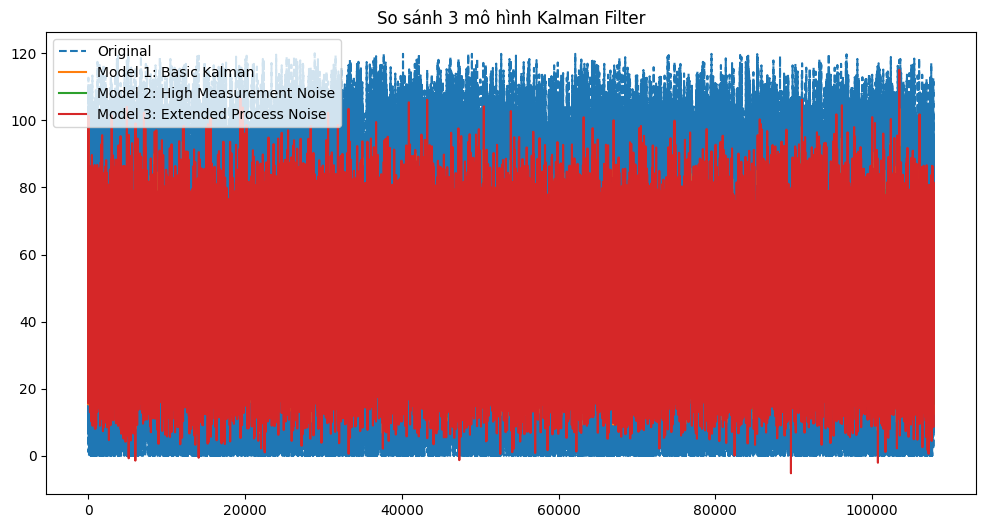

In [20]:
# So sánh 3 mô hình
plt.figure(figsize=(12, 6))
plt.plot(values, label='Original', linestyle='--')
plt.plot(filtered_1, label='Model 1: Basic Kalman')
plt.plot(filtered_2, label='Model 2: High Measurement Noise')
plt.plot(filtered_3, label='Model 3: Extended Process Noise')
plt.legend()
plt.title("So sánh 3 mô hình Kalman Filter")
plt.show()